In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#生成数据

#下载MNIST手写数字数据集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, transform = transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

* 手动实现L2正则化

In [3]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [29]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 600
def init_w_b():

    W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
    b1 = torch.zeros(num_hiddens, dtype = torch.float)
    W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
    b2 = torch.zeros(num_outputs,dtype=torch.float)

    params = [W1,b1,W2,b2]
    for param in params:
        param.requires_grad_(requires_grad=True)
    return W1,b1,W2,b2

In [28]:
def net(X):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    return (torch.matmul(H1,W2) + b2).relu()

In [30]:
def train(lamda):
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum() + lamda*l2_penalty(W1) + lamda*l2_penalty(W2)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum() + lamda*l2_penalty(W1) + lamda*l2_penalty(W2)
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [31]:
Lamda = [0,0.2,0.5]
Train_ls, Test_ls = [], []
for lamda in Lamda:
    W1,b1,W2,b2 = init_w_b()
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD([W1,b1,W2,b2],lr = 0.001)
    train_ls, test_ls = train(lamda)
    Train_ls.append(train_ls)
    Test_ls.append(test_ls)

epoch: 1, train loss: 0.239807, test loss: 0.129059
epoch: 2, train loss: 0.097687, test loss: 0.080839
epoch: 3, train loss: 0.075931, test loss: 0.073431
epoch: 4, train loss: 0.072575, test loss: 0.072277
epoch: 5, train loss: 0.072046, test loss: 0.072090
epoch: 6, train loss: 0.071956, test loss: 0.072055
epoch: 7, train loss: 0.071937, test loss: 0.072046
epoch: 8, train loss: 0.071931, test loss: 0.072042
epoch: 9, train loss: 0.071928, test loss: 0.072040
epoch: 10, train loss: 0.071926, test loss: 0.072038
epoch: 11, train loss: 0.071924, test loss: 0.072037
epoch: 12, train loss: 0.071923, test loss: 0.072036
epoch: 13, train loss: 0.071923, test loss: 0.072036
epoch: 14, train loss: 0.071922, test loss: 0.072035
epoch: 15, train loss: 0.071922, test loss: 0.072035
epoch: 16, train loss: 0.071921, test loss: 0.072035
epoch: 17, train loss: 0.071921, test loss: 0.072034
epoch: 18, train loss: 0.071921, test loss: 0.072034
epoch: 19, train loss: 0.071921, test loss: 0.072034
ep

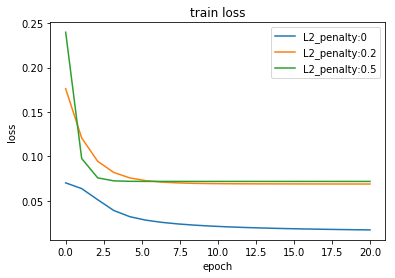

In [55]:
x = np.linspace(0,len(Train_ls[1]),len(Train_ls[1]))
for i in range(0,len(Lamda)):
    plt.plot(x,Train_ls[i],label= f'L2_penalty:{Lamda [i]}',linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
plt.legend()
plt.title('train loss')
plt.show()

* 利用torch.nn实现L2正则化

In [ ]:
class muti_class_LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens):
        super(muti_class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.relu(x)
        return y

In [ ]:
def train_torch(lamda):
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum() 
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            l.backward()
            optimizer_w.step()
            optimizer_b.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [ ]:
Lamda = [0,0.2,0,5]
torch_Train_ls, torch_Test_ls = [], []
for lamda in Lamda:
    W1,b1,W2,b2 = init_w_b()
    loss = nn.CrossEntropyLoss()
    optimizer_w = torch.optim.SGD([W1,W2],lr = 0.001,weight_decay=lamda)
    optimizer_b = torch.optim.SGD([b1,b2],lr = 0.001)
    train_ls, test_ls = train_torch(lamda)
    torch_Train_ls.append(train_ls)
    torch_Test_ls.append(test_ls)

<img src="torch_L2.jpg">